## Vinícius Renato Rocha Geraldo

## Declaração dos imports

In [0]:
import math 
import numpy as np
from scipy import linalg
from pylab import *

# Implementação da Eliminação de Gauss

In [0]:
def eliminacaoGauss(n, A, b):
  det = 1
  info = 0
  
  print('Matriz Original')
  for i in range (0, n):
    for j in range (0, n):
      print(A[i][j], end = '\t')
    print(b[i])  
  
  
  for j in range(0, n - 1): #Escolha do elemento pivô
    p = j
    Amax = abs(A[j][j])
    for k in range (j + 1, n):
      if(abs(A[k][j]) > Amax):
        Amax = abs(A[k][j])
        p = k
    
    #if p != j: #Troca de linha
    #  for k in range (1, n):
    #    t = A[j][k]
    #    A[j][k] = A[p][k]
    #    A[p][k] = t
     
    #  t = b[j]
    #  b[j] = b[p]
    #  b[p] = t
    #  det = -det
    
    det = det*A[j][j]
    
    #Eliminação de Gauss
    if abs(A[j][j]) != 0:
      r = 1/A[j][j]
      
      for i in range(j + 1, n):
        mult = A[i][j] * r
        A[i][j] = 0 
        for k in range (j + 1, n):
          A[i][k] = A[i][k] - (mult*A[j][k])
        
        b[i] = b[i] - (mult*b[j])
    
    else:
      if (info == 0):
        info = j;
  
  det = det * A[n - 1][n - 1]
  
  if (info == 0) and (abs(A[n - 1][n - 1]) == 0):
    info = n;
  
  print('\n')
  print('Determinante: ', det)
  print('\n')
  print("Matriz por Eliminação de Gauss")
  for i in range (0, n):
    for j in range (0, n):
      print(A[i][j], end = '\t')
    print(b[i])
  
  x = linalg.solve(A, b)
  for i in range (0, n):
    x[i] = round(x[i], n) #Printa conforme a quantidade de mantissa que deseja, nesse exemplo a quantidade da mantissa é o mesmo tamanho da dimensão da matriz informada
  print(x) 

## Entradas

In [0]:
A = np.array([[2, 3, -1], [4, 4, -3], [2, -3, 1]])
b = np.array([5, 3, -1])

eliminacaoGauss(3, A, b)

Matriz Original
2	3	-1	5
4	4	-3	3
2	-3	1	-1


Determinante:  -20


Matriz por Eliminação de Gauss
2	3	-1	5
0	-2	-1	-7
0	0	5	15
[1. 2. 3.]


## Questão 1 - Lista 6

In [0]:
# Letra A
A_a = np.array([[-2, 3, 1], [2, 1, -4], [7, 10, -6]])
b_a = np.array([-5, -9, 2])

eliminacaoGauss(3, A_a, b_a)
print('---------------------------------------------')
print("\n")
# Letra B
A_b = np.array([[1, -3, 5, 6], [-9, 4, -1, 0], [3, 2, -2, 7], [1, 2, 5, -4]])
b_b = np.array([17, 29, -11, 7])

eliminacaoGauss(4, A_b, b_b)
print('---------------------------------------------')
print("\n")
# Letra C
A_c = np.array([[-2, 3, 1, 5], [5, 1, -1, 0], [1, 6, 3, -1], [4, 5, 2, 8]])
b_c = np.array([2, -1, 0, 6])

eliminacaoGauss(4, A_c, b_c)
print('---------------------------------------------')
print("\n")

# Letra D
A_d = np.array([[0, 1, 3, 2, 4], [8, -2, 9, -1, 2], [5, 1, 1, 7, 2], [-2, 4, 5, 1, 0], [7, -3, 2, -4, 1]])
b_d = np.array([3, -5, 6, -1, 8])

eliminacaoGauss(5, A_d, b_d)


Matriz Original
-2	3	1	-5
2	1	-4	-9
7	10	-6	2


Determinante:  -104


Matriz por Eliminação de Gauss
-2	3	1	-5
0	4	-3	-14
0	0	13	55
[ 4.125 -0.327  4.231]
---------------------------------------------


Matriz Original
1	-3	5	6	17
-9	4	-1	0	29
3	2	-2	7	-11
1	2	5	-4	7


Determinante:  2760


Matriz por Eliminação de Gauss
1	-3	5	6	17
0	-23	44	54	182
0	0	4	14	25
0	0	0	-30	-27
[-3.5087  0.1304  3.1     0.9   ]
---------------------------------------------


Matriz Original
-2	3	1	5	2
5	1	-1	0	-1
1	6	3	-1	0
4	5	2	8	6


Determinante:  -320


Matriz por Eliminação de Gauss
-2	3	1	5	2
0	8	1	12	4
0	0	2	-9	-2
0	0	0	10	6
[ 0.4313 -0.6125  1.7     0.6   ]
---------------------------------------------


Matriz Original
0	1	3	2	4	3
8	-2	9	-1	2	-5
5	1	1	7	2	6
-2	4	5	1	0	-1
7	-3	2	-4	1	8


Determinante:  0


Matriz por Eliminação de Gauss
0	1	3	2	4	3
8	-2	9	-1	2	-5
5	0	5	6	3	3
-2	0	0	-28	-9	-24
7	0	0	0	0	11
[ 1.57143  0.49763 -2.38703 -0.03769  2.43471]


# Implementação  Fatoração LU

In [0]:
def fatoracaoLU(m, n, A):
  pivot = []
  for i in range(0, m):
    pivot.append(i)
  pdu = 1
  info = 0
  for j in range(min(m, n)):
    #Escolha do elemento pivô
    p = j
    Amax = abs(A[j][j])
    for k in range((j + 1), m):
      if (abs(A[k][j]) > Amax):
        Amax = abs(A[k][j])
        p = k
    
    #Troca de linhas
    #if p != j:
    #  for k in range(1, n):
    #    t = A[j][k]
    #    A[j][k] = A[p][k]
    #    A[p][k] = t
    #  
    #  i = pivot[j]
    #  pivot[j] = pivot[p]
    #  pivot[p] = i
    #  pdu = -pdu
    
    pdu = pdu * A[j][j]
    
    #Eliminação de Gauss
    if abs(A[j][j]) != 0:
      r = 1/A[j][j]
      
      for i in range ((j + 1), m):
        mult = A[i][j] * r
        A[i][j] = mult
        for k in range(j + 1, n):
          A[i][k] = A[i][k] - (mult*A[j][k])
    
    else:
      if (info == 0):
        info = j
  
  print("Metodo de Fatoração LU\n")
  
  for i in range(0, m):
    for j in range(0, n):
      print(A[i][j], end = '\t')
    print('\n')
    
  print("Pivot: ",pivot)
  print("PdU: ",pdu)
    
        
      
        
  

In [0]:
def fat_LU(m, n, A, b):
  U = np.copy(A)  
  n = len(A)  
  L = np.eye(n)  
  for j in range(n-1):  
    for i in range(j+1,n):  
      L[i,j] = U[i,j]/U[j,j]  
      for k in range(j+1,n):  
        U[i,k] = U[i,k] - L[i,j]*U[j,k]  
      U[i,j] = 0  
  
  L = np.around(L, n)
  U = np.around(U, n)
  print("L:")
  print(L)
  print("\n")
  print("U:")
  print(U)
  
  #Calculo da resolução de sistemas
  y = linalg.solve(L, b)
  x = linalg.solve(U, y)
  
  print("Solução das matrizes: \n")
  print("Solução Y")
  for i in range (0, n):
    y[i] = round(y[i], m) #Printa conforme a quantidade de mantissa que deseja, nesse exemplo foi feito conforme o tamanho da matriz a quantidade da matriz
  print(y)
  print("\n")
  print("Solução X")
  for i in range (0, n):
    x[i] = round(x[i], m) #Printa conforme a quantidade de mantissa que deseja, nesse exemplo foi feito conforme o tamanho da matriz a quantidade da matriz 
  print(x)
  
  
  

## Entradas

In [0]:
A = np.array([[3, 2, 4], [1, 1, 2], [4, 3, -2]])
fatoracaoLU(3, 3, A)

Metodo de Fatoração LU

3	2	4	

0	0	0	

1	0	-7	

Pivot:  [0, 1, 2]
PdU:  0


## Méotodo direto da fatoração LU

In [0]:
A = np.array([[3.0, 2.0, 4.0],
              [1.0, 1.0, 2.0],
              [4.0, 3.0, -2.0]])  

b = np.array([1, 2, 3])
fat_LU(3, 3, A, b)

L:
[[1.    0.    0.   ]
 [0.333 1.    0.   ]
 [1.333 1.    1.   ]]


U:
[[ 3.     2.     4.   ]
 [ 0.     0.333  0.667]
 [ 0.     0.    -8.   ]]
Solução das matrizes: 

Solução Y
[1.    1.667 0.   ]


Solução X
[-3.004  5.006 -0.   ]


## Questão 2 - Lista 6

In [0]:
# Letra A
A = np.array([[4.0, -1.0, 3.0, 8.0],
              [1.0, 6.0, 2.0, -3.0],
              [5.0, 5.0, 1.0, 0.0],
              [2.0, 4.0, -2.0, 1.0]])  

b = np.array([43.0, 7.0, 8.0, 8.0])
fat_LU(4, 4, A, b)
print('---------------------------------------------')
print("\n")

# Letra B 
A = np.array([[3.0, -2.0, -1.0, 7.0, 3.0],
              [-1.0, 1.0, 3.0, -2.0, -3.0],
              [8.0, 4.0, -1.0, 0.0, 2.0],
              [2.0, -3.0, 2.0, 5.0, 0.0],
              [-1.0, 3.0, 0.0, -8.0, -2.0]])  

b = np.array([45.0, -8.0, 8.0, -18.0, 0.0])
fat_LU(5, 5, A, b)
print('---------------------------------------------')
print("\n")

# Letra C
A = np.array([[4.0, 12.0, 14.0, 5.0, 2.0, -1.0],
              [1.0, -3.0, 12.0, 2.0, 3.0, -2.0],
              [-2.0, 4.0, 10.0, 10.0, -2.0, 0.0],
              [7.0, -3.0, -5.0, 12.0, 8.0, 10.0],
              [10.0, 7.0, 1.0, 8.0, 12.0, -8.0],
              [8.0, 10.0, 0.0, 11.0, -2.0, 15.0]])  

b = np.array([102.0, 105.0, -67.0, 18.0, 100.0, -90.0])
fat_LU(8, 6, A, b)




L:
[[1.   0.   0.   0.  ]
 [0.25 1.   0.   0.  ]
 [1.25 1.   1.   0.  ]
 [0.5  0.72 1.1  1.  ]]


U:
[[ 4.   -1.    3.    8.  ]
 [ 0.    6.25  1.25 -5.  ]
 [ 0.    0.   -4.   -5.  ]
 [ 0.    0.    0.    6.1 ]]
Solução das matrizes: 

Solução Y
[ 43.    -3.75 -42.    35.4 ]


Solução X
[-2.4426  3.3934  3.2459  5.8033]
---------------------------------------------


L:
[[ 1.       0.       0.       0.       0.     ]
 [-0.33333  1.       0.       0.       0.     ]
 [ 2.66667 28.       1.       0.       0.     ]
 [ 0.66667 -5.      -0.21918  1.       0.     ]
 [-0.33333  7.       0.26027  0.17219  1.     ]]


U:
[[  3.       -2.       -1.        7.        3.     ]
 [  0.        0.33333   2.66667   0.33333  -2.     ]
 [  0.        0.      -73.      -28.       50.     ]
 [  0.        0.        0.       -4.13699  -1.0411 ]
 [  0.        0.        0.        0.        0.16556]]
Solução das matrizes: 

Solução Y
[  45.         6.99985 -307.99595  -80.50745   60.02558]


Solução X
[-68.38216  27

# Implementação Fatoração Cholesky

In [0]:
def cholesky(m, n, A, b):
  det = 1
  info = 0 
  
  for j in range (1, n):
    soma = 0
    
    for k in range (1, j - 1):
      soma = soma + (A[j][k] * A[j][k])
    
    t = A[j][j] - soma
    if (t > 0):
      A[j][j] = math.sqrt(t) 
      r = 1/A[j][j]
      det = det * t
    
    else: 
      info = j
      print("Matriz não é definida positiva")
      return 0
    
    for i in range (j + 1, n):
      soma = 0
      
      for k in range (1, j - 1):
        soma = soma + (A[i][k] * A[j][k])
      
      A[i][j] = (A[i][j] - soma) * r
  
  At = A.T
 
  y = linalg.solve(A, b)
  x = linalg.solve(At, y)
  
  print("Matriz Cholesky")
  for i in range (0, n):
    for j in range (0, n):
      print(A[i][j], end = '\t')
    print('\n')
  
  print("Matriz Transposta de Cholesky (G^t)")
  for i in range(0, n):
    for j in range(0, n):
      print(At[i][j], end = '\t')
    print('\n')  
  
  for i in range (0, n):
    x[i] = round(x[i], m)
  
  for i in range (0, n):
    y[i] = round(y[i], m)
  
  print('Determinante: ', det)
  print("Vetor solução X: ", x)
  print("Vetor solução Y: ", y)

## Entradas

In [0]:
A = np.array([[1.0, 1.0, 0.0], [1.0, 2.0, -1.0], [0.0, -1.0, 3.0]])
b = np.array([2.0, 1.0, 5.0])
cholesky(3, 3, A, b) #primeiro parâmetro é a mantissa desejada


Matriz Cholesky
1.0	1.0	0.0	

1.0	1.4142135623730951	-1.0	

0.0	-0.7071067811865475	1.7320508075688772	

Matriz Transposta de Cholesky (G^t)
1.0	1.0	0.0	

1.0	1.4142135623730951	-0.7071067811865475	

0.0	-1.0	1.7320508075688772	

Determinante:  6.0
Vetor solução X:  [-115057.068  114742.779   66322.991]
Vetor solução Y:  [-314.289  316.289  132.011]


## Lista 6 - Fatoração Cholesky

In [0]:
# Letra A
A = np.array([[9.0, -6.0, 3.0], [-6.0, 29.0, -7.0], [3.0, -7.0, 18.0]])
b = np.array([-3.0, -8.0, 33.0])

cholesky(4, 3, A, b)

print("---------------------------------------")
print("\n")

# Letra B
A = np.array([[4.0, -2.0, 4.0, 10.0],
              [-2.0, 3.0, -1.0, -7.0], 
              [4.0, -1.0, 14.0, 11.0],
              [10.0, -7.0, 11.0, 31.0]])

b = np.array([2.0, 2.0, -1.0, -2.0])

cholesky(5, 4, A, b)

print("---------------------------------------")
print("\n")

# Letra C
A = np.array([[1.0, 2.0, -3.0, 0.0, 3.0],
              [2.0, 5.0, -1.0, 1.0, 4.0], 
              [-3.0, -1.0, 50.0, 1.0, -19.0],
              [0.0, 1.0, 1.0, 6.0, 0.0],
              [3.0, 4.0, -19.0, 0.0, 39.0]])

b = np.array([17.0, 41.0, -45.0, 30.0, 51.0])

cholesky(5, 5, A, b)


Matriz Cholesky
9.0	-6.0	3.0	

-6.0	5.385164807134504	-7.0	

3.0	-1.299867367239363	4.242640687119285	

Matriz Transposta de Cholesky (G^t)
9.0	-6.0	3.0	

-6.0	5.385164807134504	-1.299867367239363	

3.0	-7.0	4.242640687119285	

Determinante:  522.0
Vetor solução X:  [ 1.9784  9.0539 15.1346]
Vetor solução Y:  [ 8.886  17.2134  6.7687]
---------------------------------------


Matriz Cholesky
4.0	-2.0	4.0	10.0	

-2.0	1.7320508075688772	-1.0	-7.0	

4.0	-0.5773502691896258	3.7416573867739413	11.0	

10.0	-4.041451884327381	2.9398736610366685	3.829708431025352	

Matriz Transposta de Cholesky (G^t)
4.0	-2.0	4.0	10.0	

-2.0	1.7320508075688772	-0.5773502691896258	-4.041451884327381	

4.0	-1.0	3.7416573867739413	2.9398736610366685	

10.0	-7.0	11.0	3.829708431025352	

Determinante:  615.9999999999999
Vetor solução X:  [ 2.79317  1.2356  -1.69918 -0.31364]
Vetor solução Y:  [-1.23169 -1.19761  2.65723 -0.60974]
---------------------------------------


Matriz Cholesky
1.0	2.0	-3.0	0.0	3.0	

2.0	2

# Implementação Gauss-Jacobi

In [0]:
def jacobi(n, A, b, tol, iteracaoMax):
  x = np.zeros(n) #coloca o tamanho do vetor de x igual ao tamanho da matriz n
  v = np.zeros(n)
  for i in range (0, n):
    x[i] = b[i]/A[i][i]
  
  iteracao = 0
  
  #Iterações de Jacobi
  
  while (1):
    for i in range (0, n):
      soma = 0
      for j in range (0, n):
        if (i != j):
          soma = soma + (A[i][j]*x[j])
      
      v[i] = (b[i] - soma)/A[i][i]
    
    normaNum = 0
    normaDen = 0
    
    for i in range (0, n):
      t = abs(v[i] - x[i])
      
      if (t > normaNum):
        normaNum = t
      
      if (abs(v[i]) > normaDen):
        normaDen = abs(v[i])
      
      x[i] = v[i]
    
    normaRel = normaNum/normaDen
    iteracao += 1
    
    print("Iterações: ", iteracao)
    print("X: ", x)
    print("NormaRel: ", normaRel)  
    if(normaRel <= tol or iteracao > iteracaoMax):
      break
      
  if (normaRel <= tol):
    info = 0 #convergiu
    print("Convergiu")
  else:
    info = 1 #não convergiu
    print("Não convergiu")
  
  print('\n')
  print("Vetor solução: ", x)
  print("Iterações total: ", iteracao)

## Entradas

In [0]:
A = np.array([[10, 2, 1], [1, 5, 1], [2, 3, 10]])
b = np.array([7, -8, 6])

jacobi(3, A, b, 0.05, 4)

Iterações:  1
X:  [ 0.96 -1.86  0.94]
NormaRel:  0.18279569892473121
Iterações:  2
X:  [ 0.978 -1.98   0.966]
NormaRel:  0.060606060606060545
Iterações:  3
X:  [ 0.9994 -1.9888  0.9984]
NormaRel:  0.016291230893000743
Convergiu


Vetor solução:  [ 0.9994 -1.9888  0.9984]
Iterações total:  3


## Lista 5 - Questão 1 (Gauss-Jacobi)

In [0]:
# Letra A
A = np.array([[1, 1], [1, -3]])
b = np.array([3, -3])

jacobi(2, A, b, 0.05, 3)

print("-----------------------------------------")
print("\n")

# Letra B
A = np.array([[1, -3], [1, 1]])
b = np.array([-3, 3])

jacobi(2, A, b, 0.05, 3)

print("-----------------------------------------")
print("\n")

# Letra C
A = np.array([[2, 5], [3, 1]])
b = np.array([-3, 2])

jacobi(2, A, b, 0.05, 3)

print("-----------------------------------------")
print("\n")

# Letra D
A = np.array([[3, 1], [2, 5]])
b = np.array([2, -3])

jacobi(2, A, b, 0.05, 3)


Iterações:  1
X:  [2. 2.]
NormaRel:  0.5
Iterações:  2
X:  [1.         1.66666667]
NormaRel:  0.6
Iterações:  3
X:  [1.33333333 1.33333333]
NormaRel:  0.2500000000000001
Iterações:  4
X:  [1.66666667 1.44444444]
NormaRel:  0.20000000000000007
Não convergiu


Vetor solução:  [1.66666667 1.44444444]
Iterações total:  4
-----------------------------------------


Iterações:  1
X:  [6. 6.]
NormaRel:  1.5
Iterações:  2
X:  [15. -3.]
NormaRel:  0.6
Iterações:  3
X:  [-12. -12.]
NormaRel:  2.25
Iterações:  4
X:  [-39.  15.]
NormaRel:  0.6923076923076923
Não convergiu


Vetor solução:  [-39.  15.]
Iterações total:  4
-----------------------------------------


Iterações:  1
X:  [-6.5  6.5]
NormaRel:  0.7692307692307693
Iterações:  2
X:  [-17.75  21.5 ]
NormaRel:  0.6976744186046512
Iterações:  3
X:  [-55.25  55.25]
NormaRel:  0.6787330316742082
Iterações:  4
X:  [-139.625  167.75 ]
NormaRel:  0.6706408345752608
Não convergiu


Vetor solução:  [-139.625  167.75 ]
Iterações total:  4
-----------

## Gerando os gráficos - Gauss Jacobi 

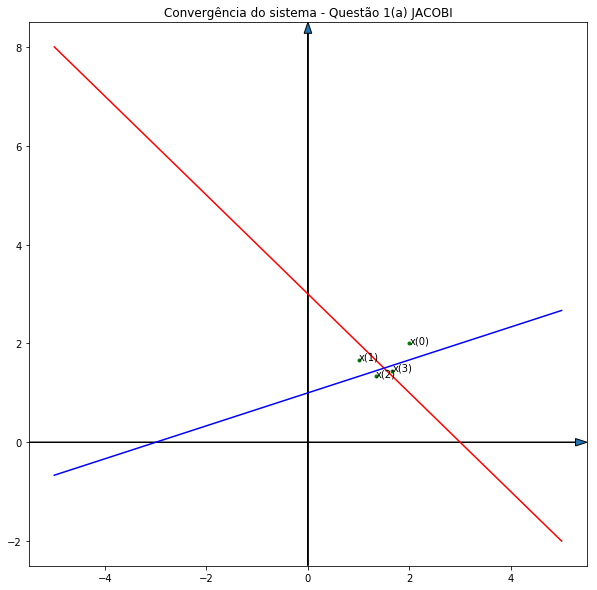

In [0]:
# Questão 1 - a
x = np.linspace(-5,5,100)
y1 = 3 - x
y2 = (3 + x) / 3
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

plt.title('Convergência do sistema - Questão 1(a) JACOBI')
plt.plot(x, y1, '-r', label='y = 3 - x')
plt.plot(x, y2, '-b', label='y2 = (x + 3) / 3')

left,right = ax.get_xlim()
low,high = ax.get_ylim()
arrow( left, 0, right -left, 0, length_includes_head = True, head_width = 0.15 )
arrow( 0, low, 0, high-low, length_includes_head = True, head_width = 0.15 )


pontos = [[2, 2],[1, 1.6667],[1.3333,1.3333], [1.6667, 1.4444]]

for i, pontos in enumerate(pontos):
  x,y = pontos
  plt.plot(x, y, '.g')
  ax.annotate('x('+str(i)+')', (x, y))

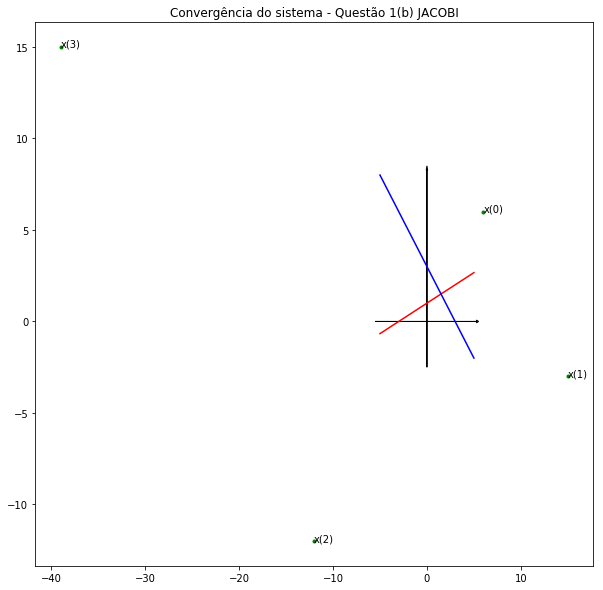

In [0]:
# Questão 1 - b
x = np.linspace(-5,5,100)
y1 = (3 + x) / 3
y2 = 3 - x
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

plt.title('Convergência do sistema - Questão 1(b) JACOBI')
plt.plot(x, y1, '-r')
plt.plot(x, y2, '-b')

left,right = ax.get_xlim()
low,high = ax.get_ylim()
arrow( left, 0, right -left, 0, length_includes_head = True, head_width = 0.15 )
arrow( 0, low, 0, high-low, length_includes_head = True, head_width = 0.15 )


pontos = [[6, 6],[15, -3],[-12, -12], [-39, 15]]

for i, pontos in enumerate(pontos):
  x,y = pontos
  plt.plot(x, y, '.g')
  ax.annotate('x('+str(i)+')', (x, y))

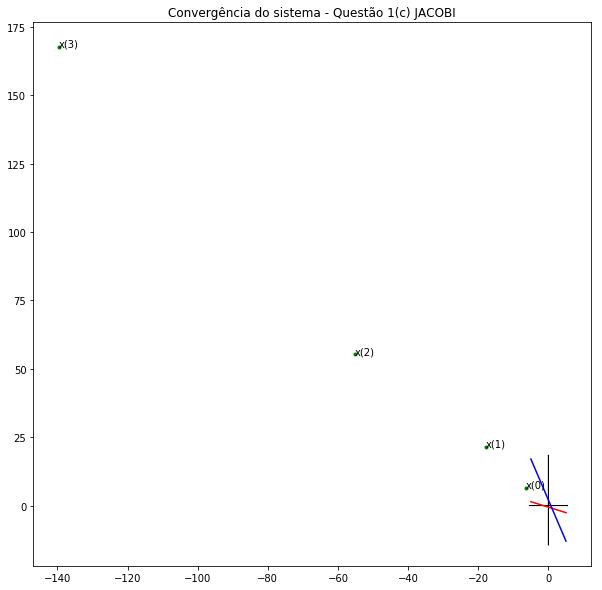

In [0]:
# Questão 1 - c
x = np.linspace(-5,5,100)
y1 = (-3 - 2*x) / 5
y2 = 2 - 3*x
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

plt.title('Convergência do sistema - Questão 1(c) JACOBI')
plt.plot(x, y1, '-r', label='y = 3 - x')
plt.plot(x, y2, '-b', label='y2 = (x + 3) / 3')

left,right = ax.get_xlim()
low,high = ax.get_ylim()
arrow( left, 0, right -left, 0, length_includes_head = True, head_width = 0.15 )
arrow( 0, low, 0, high-low, length_includes_head = True, head_width = 0.15 )


pontos = [[-6.5, 6.5],[-17.75, 21.5],[-55.25, 55.25], [-139.625, 167.75]]

for i, pontos in enumerate(pontos):
  x,y = pontos
  plt.plot(x, y, '.g')
  ax.annotate('x('+str(i)+')', (x, y))

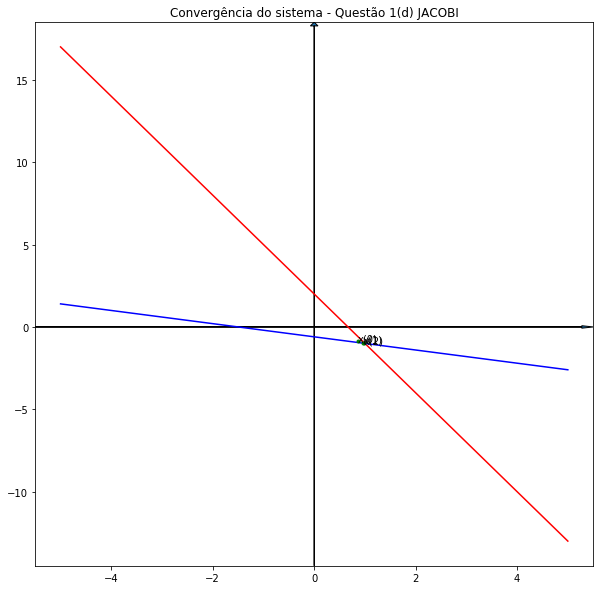

In [0]:
# Questão 1 - d
x = np.linspace(-5,5,100)
y1 = 2 - 3*x
y2 = (-3 - 2*x) / 5
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

plt.title('Convergência do sistema - Questão 1(d) JACOBI')
plt.plot(x, y1, '-r', label='y1 = 2 - 3x')
plt.plot(x, y2, '-b', label='y2 = (-2x - 3) / 3')

left,right = ax.get_xlim()
low,high = ax.get_ylim()
arrow( left, 0, right -left, 0, length_includes_head = True, head_width = 0.15 )
arrow( 0, low, 0, high-low, length_includes_head = True, head_width = 0.15 )


pontos = [[0.8667, -0.8667],[ 0.9556, -0.9467],[0.9822, -0.9822]]

for i, pontos in enumerate(pontos):
  x,y = pontos
  plt.plot(x, y, '.g')
  ax.annotate('x('+str(i)+')', (x, y))  

# Implementação Gauss-Seidel

In [0]:
def seidel(n, A, b, tol, iteracaoMax):
  x = np.zeros(n)
  v = np.zeros(n)
  pontos_x = [] 
  for i in range(0, n):
    x[i] = b[i]/A[i][i]
  
  iteracao = 0
  
  #Iterações de Gauss-Seidel
  while(1):
    normaNum = 0
    normaDen = 0
    for i in range(0, n):
      soma = 0
      for j in range(0, n):
        if (i != j):
          soma += A[i][j] * x[j]
      
      v[i] = x[i]
      x[i] = (b[i] - soma)/A[i][i]
      t = abs(v[i] - x[i])
      
      if (t > normaNum):
        normaNum = t
      
      if (abs(x[i]) > normaDen):
        normaDen = abs(x[i])
    
    normaRel = normaNum/normaDen
    pontos_x.append(x)
    
    print("Iteração: ", iteracao)
    print("X: ", x)
    print("NormaRel: ", normaRel)
    iteracao += 1
    #Teste de convergência
    if (normaRel <= tol or iteracao >= iteracaoMax):
      break
  
  if (normaRel <= tol):
    info = 0
    print("Convergiu!! ", info)
  
  else:
    info = 1
    print("Não convergiu!! ", info)
  
  print('\n')
  print("Vetor solução: ", x)
  print("Iterações total: ", iteracao)
 

## Entradas

In [0]:
A = np.array([[10, 2, 1], [1, 5, 1], [2, 3, 10]])
b = np.array([7, -8, 6])
seidel(3, A, b, 0.05, 4)

Iteração:  0
X:  [ 0.96   -1.912   0.9816]
NormaRel:  0.199581589958159
Iteração:  1
X:  [ 0.98424   -1.993168   1.0011024]
NormaRel:  0.04072311014425272
Convergiu!!  0


Vetor solução:  [ 0.98424   -1.993168   1.0011024]
Iterações total:  2


## Questão 1 - Lista 5 (Seidel)

In [0]:
# Letra A
A = np.array([[1, 1], [1, -3]])
b = np.array([3, -3])

seidel(2, A, b, 0.05, 4)

print("-----------------------------------------")
print("\n")

# Letra B
A = np.array([[1, -3], [1, 1]])
b = np.array([-3, 3])

seidel(2, A, b, 0.05, 4)

print("-----------------------------------------")
print("\n")

# Letra C
A = np.array([[2, 5], [3, 1]])
b = np.array([-3, 2])

seidel(2, A, b, 0.05, 4)

print("-----------------------------------------")
print("\n")

# Letra D
A = np.array([[3, 1], [2, 5]])
b = np.array([2, -3])

seidel(2, A, b, 0.05, 4)


Iteração:  0
X:  [2.         1.66666667]
NormaRel:  0.5
Iteração:  1
X:  [1.33333333 1.44444444]
NormaRel:  0.4615384615384616
Iteração:  2
X:  [1.55555556 1.51851852]
NormaRel:  0.1428571428571429
Iteração:  3
X:  [1.48148148 1.49382716]
NormaRel:  0.04958677685950405
Convergiu!!  0


Vetor solução:  [1.48148148 1.49382716]
Iterações total:  4
-----------------------------------------


Iteração:  0
X:  [ 6. -3.]
NormaRel:  1.5
Iteração:  1
X:  [-12.  15.]
NormaRel:  1.2
Iteração:  2
X:  [ 42. -39.]
NormaRel:  1.2857142857142858
Iteração:  3
X:  [-120.  123.]
NormaRel:  1.3170731707317074
Não convergiu!!  1


Vetor solução:  [-120.  123.]
Iterações total:  4
-----------------------------------------


Iteração:  0
X:  [-6.5 21.5]
NormaRel:  0.9069767441860465
Iteração:  1
X:  [-55.25 167.75]
NormaRel:  0.8718330849478391
Iteração:  2
X:  [-420.875 1264.625]
NormaRel:  0.8673519818127904
Iteração:  3
X:  [-3163.0625  9491.1875]
NormaRel:  0.8667579794414556
Não convergiu!!  1


Vetor s

## Gerando os Gráficos - Gauss Seidel

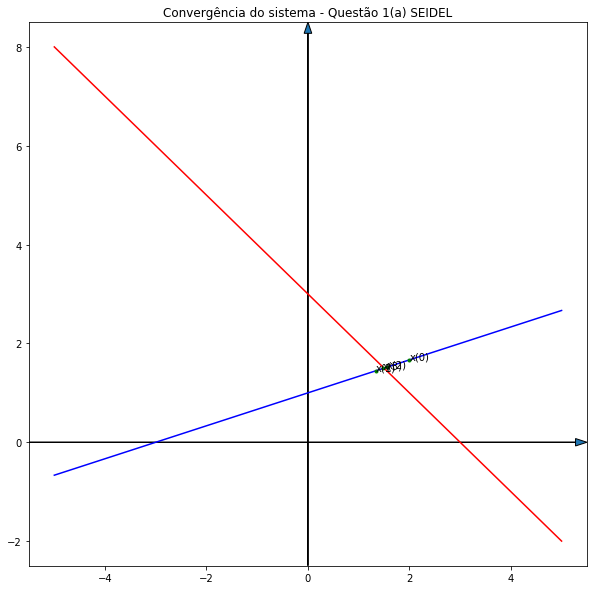

In [0]:
# Questão 1 - a
x = np.linspace(-5,5,100)
y1 = 3 - x
y2 = (3 + x) / 3
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

plt.title('Convergência do sistema - Questão 1(a) SEIDEL')
plt.plot(x, y1, '-r', label='y = 3 - x')
plt.plot(x, y2, '-b', label='y2 = (x + 3) / 3')

left,right = ax.get_xlim()
low,high = ax.get_ylim()
arrow( left, 0, right -left, 0, length_includes_head = True, head_width = 0.15 )
arrow( 0, low, 0, high-low, length_includes_head = True, head_width = 0.15 )


pontos = [[2, 1.6667],[1.3333, 1.4444],[1.5556, 1.5185], [1.4814, 1.4936]]

for i, pontos in enumerate(pontos):
  x,y = pontos
  plt.plot(x, y, '.g')
  ax.annotate('x('+str(i)+')', (x, y))


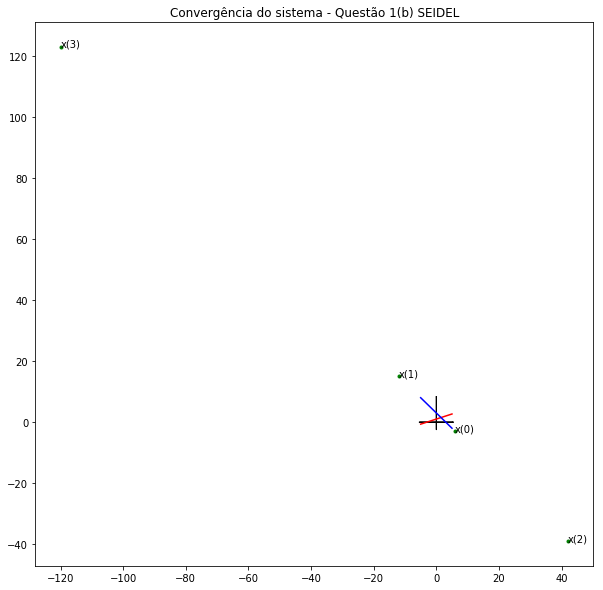

In [0]:
# Questão 1 - b
x = np.linspace(-5,5,100)
y1 = (3 + x) / 3
y2 = 3 - x
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

plt.title('Convergência do sistema - Questão 1(b) SEIDEL')
plt.plot(x, y1, '-r', label='y = 3 - x')
plt.plot(x, y2, '-b', label='y2 = (x + 3) / 3')

left,right = ax.get_xlim()
low,high = ax.get_ylim()
arrow( left, 0, right -left, 0, length_includes_head = True, head_width = 0.15 )
arrow( 0, low, 0, high-low, length_includes_head = True, head_width = 0.15 )


pontos = [[6, -3],[-12, 15],[42, -39], [-120, 123]]

for i, pontos in enumerate(pontos):
  x,y = pontos
  plt.plot(x, y, '.g')
  ax.annotate('x('+str(i)+')', (x, y))

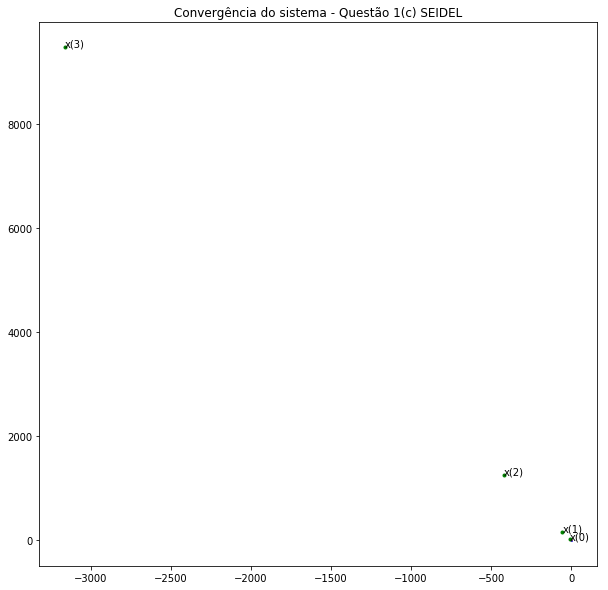

In [0]:
# Questão 1 - c
x = np.linspace(-5,5,100)
y1 = (-3 - 2*x) / 5
y2 = 2 - 3*x
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

plt.title('Convergência do sistema - Questão 1(c) SEIDEL')
plt.plot(x, y1, '-r', label='y = 3 - x')
plt.plot(x, y2, '-b', label='y2 = (x + 3) / 3')

left,right = ax.get_xlim()
low,high = ax.get_ylim()
arrow( left, 0, right -left, 0, length_includes_head = True, head_width = 0.15 )
arrow( 0, low, 0, high-low, length_includes_head = True, head_width = 0.15 )


pontos = [[-6.5, 21.5],[-55.25, 167.25],[-420.875, 1264.625], [-3163.0625, 9491.1875]]

for i, pontos in enumerate(pontos):
  x,y = pontos
  plt.plot(x, y, '.g')
  ax.annotate('x('+str(i)+')', (x, y))

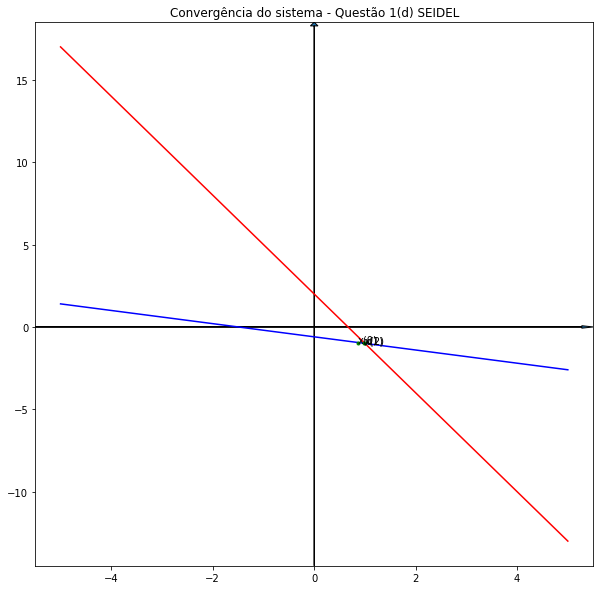

In [0]:
# Questão 1 - d
x = np.linspace(-5,5,100)
y1 = 2 - 3*x
y2 = (-3 - 2*x) / 5
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

plt.title('Convergência do sistema - Questão 1(d) SEIDEL')
plt.plot(x, y1, '-r', label='y1 = 3 - x')
plt.plot(x, y2, '-b', label='y2 = (x + 3) / 3')

left,right = ax.get_xlim()
low,high = ax.get_ylim()
arrow( left, 0, right -left, 0, length_includes_head = True, head_width = 0.15 )
arrow( 0, low, 0, high-low, length_includes_head = True, head_width = 0.15 )


pontos = [[0.8667, -0.9467],[0.9822, -0.9929],[0.9976, -0.9990]]

for i, pontos in enumerate(pontos):
  x,y = pontos
  plt.plot(x, y, '.g')
  ax.annotate('x('+str(i)+')', (x, y))  

# Implementação de Newton

In [0]:
#Questão 1a
def Fx_a(x0):
  w = np.zeros(3)
  w[0] = x0[0]**2 + x0[1]**2 +  x0[2]**3 - 9
  w[1] = x0[0]*x0[1]*x0[2] - 1
  w[2] = x0[0] + x0[1] - x0[2]**2
  return w

def Jx_a(x0):
  x = x0[0]
  y = x0[1]
  z = x0[2]
  
  w = np.zeros((3,3))
  w[0][0] = 2*x
  w[0][1] = 2*y
  w[0][2] = 3*z**2

  w[1][0] = y*z
  w[1][1] = x*z
  w[1][2] = x*y

  w[2][0] = 1
  w[2][1] = 1
  w[2][2] = -2*z
  return w

#Questão 1b
def Fx_b(x0):
  w = np.zeros(2)
  w[0] = x0[0]**3 + 3*x0[1]**2 -21
  w[1] = x0[0]**2 + 2*x0[1] + 2
  return w

def Jx_b(x0):
  x = x0[0]
  y = x0[1]
  
  w = np.zeros((2,2))
  w[0][0] = 3*x**2
  w[0][1] = 6*y
  
  w[1][0] = 2*x
  w[1][1] = 2
  
  return w


#Questão 1c
def Fx_c(x0):
  w = np.zeros(2)
  w[0] = x0[0]**2 + x0[0]*(x0[1]**3) - 9
  w[1] = 3*(x0[0]**2)*x0[1] - x0[1]**3 - 4
  return w

def Jx_c(x0):
  x = x0[0]
  y = x0[1]
  
  w = np.zeros((2,2))
  w[0][0] = 2*x + y**3
  w[0][1] = 3*x*y**2
  
  w[1][0] = 6*x*y
  w[1][1] = 3*x**2 - 3*y**2
  
  return w

#Questão 1d
def Fx_d(x0):
  w = np.zeros(2)
  w[0] = 3*(x0[0]**2) + x0[1] - 3.5
  w[1] = x0[0] + x0[1]**3 - 1.625
  return w

def Jx_d(x0):
  x = x0[0]
  y = x0[1]
  
  w = np.zeros((2,2))
  w[0][0] = 6*x
  w[0][1] = 1
  
  w[1][0] = 1
  w[1][1] = 3*y**2
  
  return w

## Função de Newton

In [0]:
from __future__ import division
import numpy as np
from numpy import linalg

def newton(Fx, Jx, x0, TOL, max_iter):
  x_atual = np.copy(x0).astype('double')
  x_anterior = np.zeros(len(x_atual))
  
  iteracao = 0
  while (iteracao < max_iter):
    iteracao += 1
    
    #iteracao Newton
    print("\nIteração:", iteracao)
    delta = -np.linalg.inv(Jx(x_atual)).dot(Fx(x_atual))
    print("DELTA =", delta)
    x_anterior = x_atual
    x_atual = x_anterior + delta
    print("Solução Iterativa", x_atual)
   
    #criterio de parada
    test = max(abs(x_atual - x_anterior))
    if ( test < TOL):
      return x_atual
  
  print('\n')
  print("Solução final da convergência: ", x_atual)
  print("Total de Iterações: ", iteracao)
  print("\n")

In [0]:
print("Questão (a)")
x0 = [1, 5, 1]
newton(Fx_a, Jx_a, x0, 1e-3, 4)

print('---------------------------------------')
print("\n")

print("Questão (b)")
x0 = [1, 0]
newton(Fx_b, Jx_b, x0, 1e-3, 4)

print('---------------------------------------')
print("\n")

print("Questão (c)")
x0 = [1, 0]
newton(Fx_c, Jx_c, x0, 1e-3, 4)

print('---------------------------------------')
print("\n")

print("Questão (d)")
x0 = [1, 0]
newton(Fx_d, Jx_d, x0, 1e-3, 4)

Questão (a)

Iteração: 1
DELTA = [-1.35810811 -1.80405405  0.91891892]
Solução Iterativa [-0.35810811  3.19594595  1.91891892]

Iteração: 2
DELTA = [ 0.38074295 -0.73362927 -0.31197209]
Solução Iterativa [0.02263484 2.46231668 1.60694683]

Iteração: 3
DELTA = [ 0.23236904 -0.21119515 -0.02369484]
Solução Iterativa [0.25500388 2.25112153 1.58325199]

Iteração: 4
DELTA = [ 0.02849957 -0.02649026  0.00045724]
Solução Iterativa [0.28350345 2.22463127 1.58370923]


Solução final da convergência:  [0.28350345 2.22463127 1.58370923]
Total de Iterações:  4


---------------------------------------


Questão (b)

Iteração: 1
DELTA = [ 6.66666667 -8.16666667]
Solução Iterativa [ 7.66666667 -8.16666667]

Iteração: 2
DELTA = [-3.11340915  1.64724794]
Solução Iterativa [ 4.55325751 -6.51941872]

Iteração: 3
DELTA = [-1.62499018  2.55234047]
Solução Iterativa [ 2.92826734 -3.96707825]

Iteração: 4
DELTA = [-0.86716546  1.21899574]
Solução Iterativa [ 2.06110188 -2.74808252]


Solução final da conver